In [32]:
# imports
import nltk
from gensim.models import Word2Vec, FastText
from sklearn.metrics.pairwise import cosine_similarity
from mittens import GloVe
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\erez1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [33]:
def train_word2vec_model(sentences, sg, window_size, epochs=150):    
    model = Word2Vec(sentences, window=window_size, min_count=1, sg=sg, epochs=epochs, workers=2, seed=42)
    return model

In [142]:
sentences = ["The bank is located near the river.", 
             "The bank approved my loan application.", 
             "He rose from his chair to close the window.", 
             "The rose bloomed beautifully in the garden.", 
             "The lead actor delivered a stunning performance.", 
             "Exposure to lead is harmful to health.", 
             "She is reading a book in the library.",
             "The book mentioned a fascinating historical event.", 
             "I need to file a report for my manager.", 
             "He lost the file containing important documents."]
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized sentences:", tokenized_sentences)

Tokenized sentences: [['the', 'bank', 'is', 'located', 'near', 'the', 'river', '.'], ['the', 'bank', 'approved', 'my', 'loan', 'application', '.'], ['he', 'rose', 'from', 'his', 'chair', 'to', 'close', 'the', 'window', '.'], ['the', 'rose', 'bloomed', 'beautifully', 'in', 'the', 'garden', '.'], ['the', 'lead', 'actor', 'delivered', 'a', 'stunning', 'performance', '.'], ['exposure', 'to', 'lead', 'is', 'harmful', 'to', 'health', '.'], ['she', 'is', 'reading', 'a', 'book', 'in', 'the', 'library', '.'], ['the', 'book', 'mentioned', 'a', 'fascinating', 'historical', 'event', '.'], ['i', 'need', 'to', 'file', 'a', 'report', 'for', 'my', 'manager', '.'], ['he', 'lost', 'the', 'file', 'containing', 'important', 'documents', '.']]


In [35]:
# try both skip-gram and CBOW
cbow_model = train_word2vec_model(tokenized_sentences, sg=0, window_size=3)
sg_model = train_word2vec_model(tokenized_sentences, sg=1, window_size=3)


In [36]:
def calculate_similarity(word, cbow_model, sg_model):
    cbow_vector = cbow_model.wv[word]
    sg_vector = sg_model.wv[word]
    cousine_similarity = cosine_similarity(cbow_vector.reshape(1, -1), sg_vector.reshape(1, -1))
    return cousine_similarity[0][0]

def get_embeddings_similarity(cbow_model, sg_model):
    similarity_per_token = {}
    for sentence in tokenized_sentences:
        for token in sentence:
            similarity = calculate_similarity(token, cbow_model, sg_model)
            similarity_per_token[token] = similarity
    return similarity_per_token

def get_most_similar_embeddings(cbow_model, sg_model):
    similarity_per_token = get_embeddings_similarity(cbow_model, sg_model)
    most_similar_embeddings = sorted(similarity_per_token.items(), key=lambda x: x[1], reverse=True)[:10]
    print("The most similar embeddings between CBOW and Skip-gram models are: ", most_similar_embeddings)

In [37]:
# the difference between the models on each token
print(get_embeddings_similarity(cbow_model, sg_model))

{'the': 0.96450263, 'bank': 0.90237683, 'is': 0.89742625, 'located': 0.9291422, 'near': 0.9399378, 'river': 0.8926098, '.': 0.9640477, 'approved': 0.96861017, 'my': 0.88274944, 'loan': 0.92010915, 'application': 0.9270045, 'he': 0.8928302, 'rose': 0.9424402, 'from': 0.8979327, 'his': 0.9245022, 'chair': 0.9166998, 'to': 0.9632003, 'close': 0.94737667, 'window': 0.9492069, 'bloomed': 0.9562955, 'beautifully': 0.9413059, 'in': 0.8872272, 'garden': 0.93698025, 'lead': 0.92818147, 'actor': 0.8966482, 'delivered': 0.8933069, 'a': 0.9393356, 'stunning': 0.89599556, 'performance': 0.91019404, 'exposure': 0.95134217, 'harmful': 0.92996186, 'health': 0.8638738, 'she': 0.93199897, 'reading': 0.95338136, 'book': 0.91429466, 'library': 0.94898564, 'mentioned': 0.919379, 'fascinating': 0.9435926, 'historical': 0.9287566, 'event': 0.9360674, 'i': 0.9141132, 'need': 0.87402284, 'file': 0.9229257, 'report': 0.9319524, 'for': 0.9113668, 'manager': 0.8415194, 'lost': 0.9315098, 'containing': 0.90864754,

### The main difference between CBOW and Skip-gram is that CBOW predicts the target word from the context words, while Skip-gram predicts the context words from the target word.
### Because the amount of sentences we have trained on isn't big, we see that most of the words have similar Vecs between the models, using cosine similarity

## The most similar embeddings between the models are:

In [38]:
get_most_similar_embeddings(cbow_model, sg_model)

The most similar embeddings between CBOW and Skip-gram models are:  [('approved', 0.96861017), ('the', 0.96450263), ('.', 0.9640477), ('to', 0.9632003), ('bloomed', 0.9562955), ('reading', 0.95338136), ('exposure', 0.95134217), ('window', 0.9492069), ('library', 0.94898564), ('close', 0.94737667)]


In [39]:
# check similarity between the models in certain window size
def check_similarity_in_window_size(window):
    cbow_model_window = train_word2vec_model(tokenized_sentences, sg=0, window_size=window)
    sg_model_window = train_word2vec_model(tokenized_sentences, sg=1, window_size=window)
    print(f"Word embeddings with window size {window}:")
    print(get_embeddings_similarity(cbow_model_window, sg_model_window))
    # print(f"Most similar embeddings with window size {window}:")
    # get_most_similar_embeddings(cbow_model_window, sg_model_window)

In [40]:
# original window size
check_similarity_in_window_size(3)
# with window size 5
check_similarity_in_window_size(5)
# with window size 7
check_similarity_in_window_size(7)
# with window size 9
check_similarity_in_window_size(9)

Word embeddings with window size 3:
{'the': 0.96450263, 'bank': 0.90237683, 'is': 0.89742625, 'located': 0.9291422, 'near': 0.9399378, 'river': 0.8926098, '.': 0.9640477, 'approved': 0.96861017, 'my': 0.88274944, 'loan': 0.92010915, 'application': 0.9270045, 'he': 0.8928302, 'rose': 0.9424402, 'from': 0.8979327, 'his': 0.9245022, 'chair': 0.9166998, 'to': 0.9632003, 'close': 0.94737667, 'window': 0.9492069, 'bloomed': 0.9562955, 'beautifully': 0.9413059, 'in': 0.8872272, 'garden': 0.93698025, 'lead': 0.92818147, 'actor': 0.8966482, 'delivered': 0.8933069, 'a': 0.9393356, 'stunning': 0.89599556, 'performance': 0.91019404, 'exposure': 0.95134217, 'harmful': 0.92996186, 'health': 0.8638738, 'she': 0.93199897, 'reading': 0.95338136, 'book': 0.91429466, 'library': 0.94898564, 'mentioned': 0.919379, 'fascinating': 0.9435926, 'historical': 0.9287566, 'event': 0.9360674, 'i': 0.9141132, 'need': 0.87402284, 'file': 0.9229257, 'report': 0.9319524, 'for': 0.9113668, 'manager': 0.8415194, 'lost': 

### We can see that the cosine similarity of the words is significantly increasing between the models when increasing the window size - because it strengths the unique functionality of each model

In [41]:
def get_words_simlarity(model, words_dict):
    for word1, word2 in words_dict.items():
        similarity = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity}")


# check similarity between two words with similar syntax
same_syntax_words = {
    "he": "she",
    "stunning": "fascinating",
    "book": "report"
}
print("Similarity between words with similar syntax with CBOW:")
get_words_simlarity(cbow_model, same_syntax_words)
print("Similarity between words with similar syntax with Skip-gram:")
get_words_simlarity(sg_model, same_syntax_words)

# check similarity between two words with similar semantics
similar_semantics_words = {
    "rose" : "garden",
    "file": "report",
    "bank": "loan"
}

print("Similarity between words with similar semantics with CBOW:")
get_words_simlarity(cbow_model, similar_semantics_words)
print("Similarity between words with similar semantics with Skip-gram:")
get_words_simlarity(sg_model, similar_semantics_words)

Similarity between words with similar syntax with CBOW:
Similarity between 'he' and 'she': 0.22245267033576965
Similarity between 'stunning' and 'fascinating': 0.11417089402675629
Similarity between 'book' and 'report': 0.4146587550640106
Similarity between words with similar syntax with Skip-gram:
Similarity between 'he' and 'she': 0.6084062457084656
Similarity between 'stunning' and 'fascinating': 0.4872681796550751
Similarity between 'book' and 'report': 0.7794286608695984
Similarity between words with similar semantics with CBOW:
Similarity between 'rose' and 'garden': 0.16565127670764923
Similarity between 'file' and 'report': 0.5214782357215881
Similarity between 'bank' and 'loan': 0.18064366281032562
Similarity between words with similar semantics with Skip-gram:
Similarity between 'rose' and 'garden': 0.5085529088973999
Similarity between 'file' and 'report': 0.8609709143638611
Similarity between 'bank' and 'loan': 0.5230200886726379


## We can see that Skip-Grem outperformed CBOW in recognizing both semantic and syntax relationships

In [42]:
# compare the models for the words bank, rose, lead, book and file
words_to_compare = ['bank', 'rose', 'lead', 'book', 'file']
for word in words_to_compare:
    print("For the word:", word, "the similarity between CBOW and Skip-gram models is:")
    print(calculate_similarity(word, cbow_model, sg_model))

For the word: bank the similarity between CBOW and Skip-gram models is:
0.90237683
For the word: rose the similarity between CBOW and Skip-gram models is:
0.9424402
For the word: lead the similarity between CBOW and Skip-gram models is:
0.92818147
For the word: book the similarity between CBOW and Skip-gram models is:
0.91429466
For the word: file the similarity between CBOW and Skip-gram models is:
0.9229257


In [43]:
fasttext_model = FastText(sentences=tokenized_sentences, window=3, sg=1)
print("Similarities with fasttext:")

fasttext_pairs = {
    "bank": "banking",
    "rose": "roses",
    "lead": "leading",
    "book": "books",
    "file": "files"
}
for word1, word2 in fasttext_pairs.items():
    similarity = fasttext_model.wv.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")


Similarities with fasttext:
Similarity between 'bank' and 'banking': 0.39471450448036194
Similarity between 'rose' and 'roses': 0.4105513393878937
Similarity between 'lead' and 'leading': 0.21785584092140198
Similarity between 'book' and 'books': 0.4938759207725525
Similarity between 'file' and 'files': 0.5773593187332153


## 2. Contextual embeddings take into account words with multiple meanings (polysemy), by saving a vector for each of the appearances of that word, resulting in a better understanding of each meaning, not like in static models like Word2Vec which only saves one vector for each word.

### These 2 examples show the polysemy "bank" with its different meanings
### 1. The bank approved my loan application.
### 2. The bank is located the river.

### Contextual embedding would create 2 separate vectors for each of the different meanings of bank, and static embedding would have one for both.

## 3. Sharon stated we shouldn't do this exercise

In [81]:
# use the brown corpus to train word2vec
brown_sentences = nltk.corpus.brown.sents()
print("Brown sentences:", brown_sentences)
brown_model = train_word2vec_model(brown_sentences, sg=1, window_size=3, epochs=5)
words_to_compare_brown = {"king": "queen", "man": "woman", "apple": "orange"}

print("Similarity between words with similar semantics in brown:")
get_words_simlarity(brown_model, words_to_compare_brown)

Brown sentences: [['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]
Similarity between words with similar semantics in brown:
Similarity between 'king' and 'queen': 0.9426028728485107
Similarity between 'man' and 'woman': 0.8983771800994873
Similarity between 'apple' and 'orange': 0.9589597582817078


### 4.b Because these pairs have similar semantic meanings the cosine similarity between them are strong, as man and woman are both genders, king and queen are rules, and apple and orange are fruits 

In [180]:
from mittens import GloVe
import numpy as np

sentences = brown_sentences[:100] # Use a subset of the Brown corpus for demonstration
# Build vocabulary
vocab = list(set(word for sent in sentences for word in sent))
word2idx = {word: i for i, word in enumerate(vocab)}
V = len(vocab)

# Initialize co-occurrence matrix
co_matrix = np.zeros((V, V), dtype=int)

def update_cooccurrence(words, window=2):
    for i, center_word in enumerate(words):
        start = max(0, i - window)
        end = min(len(words), i + window + 1)

        for j in range(start, end):
            if i != j:
                center_idx = vocab.index(center_word)
                context_idx = vocab.index(words[j])
                co_matrix[center_idx, context_idx] += 1

for sentence in sentences:
    update_cooccurrence(sentence)

# Train GloVe model with Mittens
glove_model = GloVe(n=25, max_iter=1000)
glove_embedding = glove_model.fit(co_matrix)

Iteration 1000: error 0.0020

In [181]:
# print the co-occurrence matrix
print(sentences)
print(vocab)
print(V)
print("Co-occurrence matrix:\n", co_matrix)

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]
['superintendent', '.', 'unmeritorious', 'intern', 'resigned', 'filed', '74', 'been', 'reportedly', 'repealed', 'quickie', 'Merger', 'Sam', 'granted', '1923', 'Aug.', 'as', 'agriculture', 'formally', 'additional', 'source', 'date', 'himself', 'event', 'son', 'quiet', 'do', 'likely', 'praise', 'scheduled', 'assistant', 'passed', 'has', 'veiled', 'let', 'determine', 'apparently', 'head'

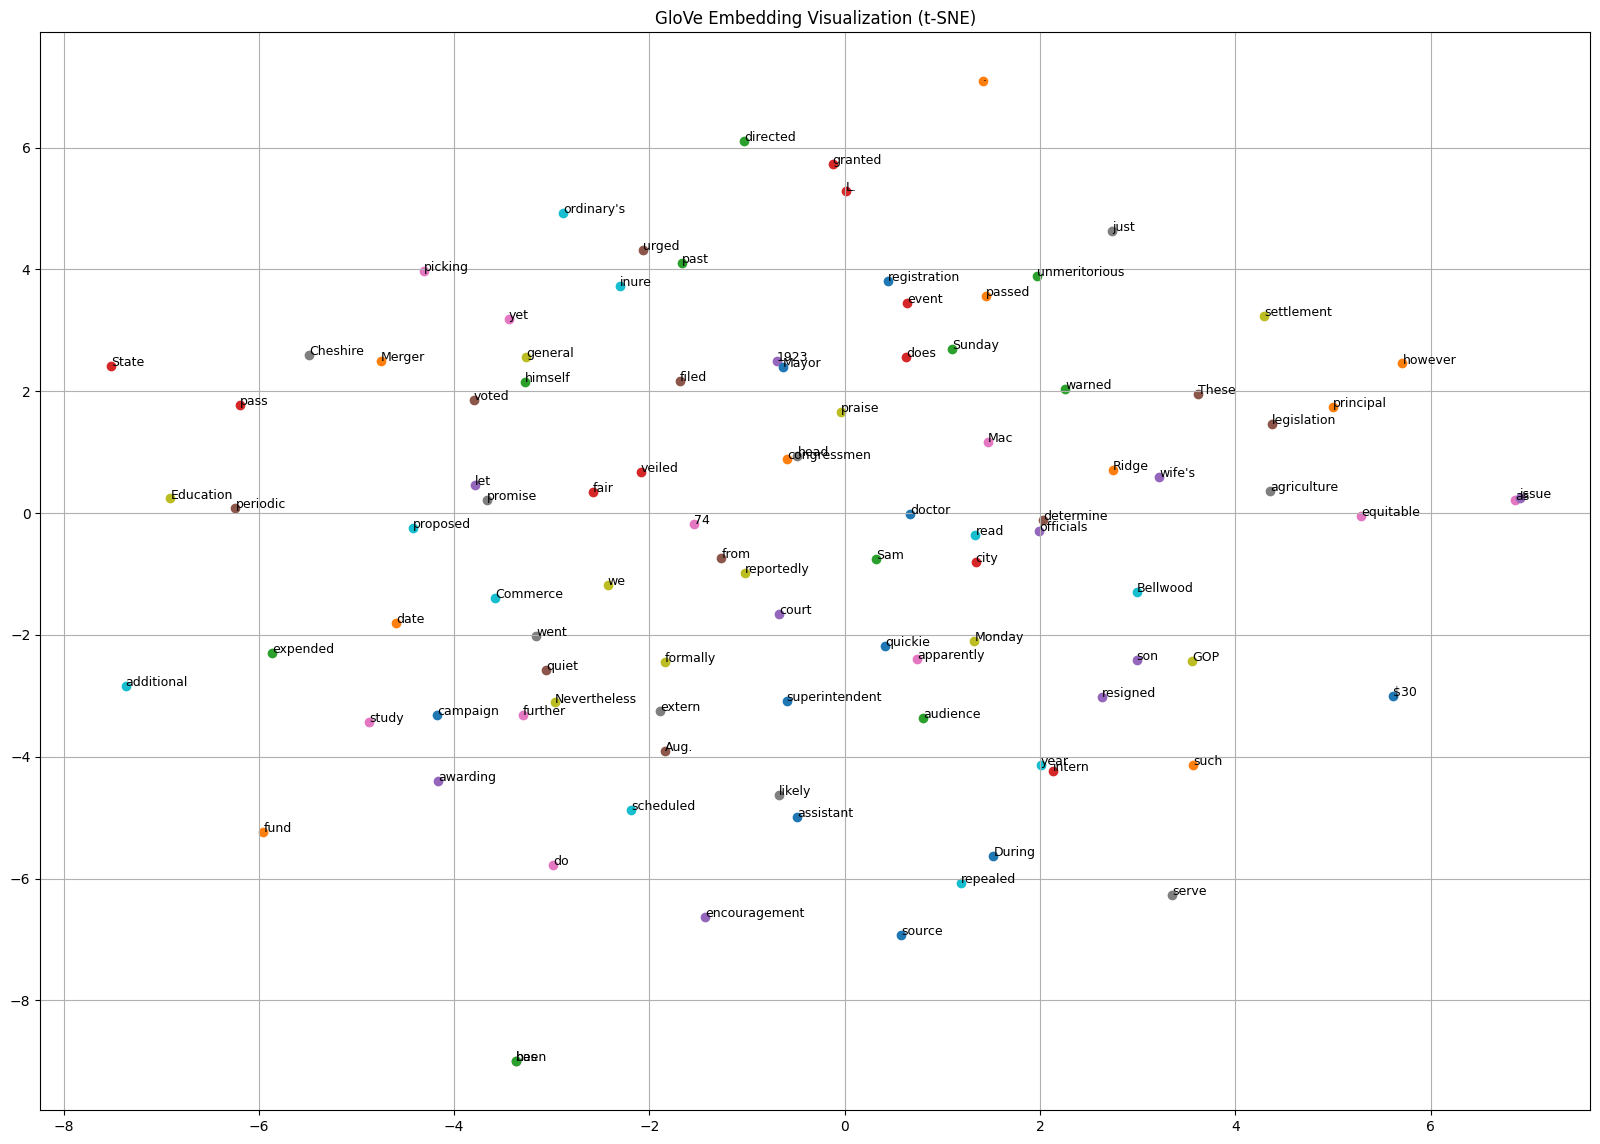

In [184]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

num_words_to_plot = 100
vocab_subset = vocab[:num_words_to_plot]
embedding_subset = glove_embedding[:num_words_to_plot]

tsne = TSNE(max_iter=500, n_components=2, perplexity=20)
embedding_2d = tsne.fit_transform(embedding_subset)

plt.figure(figsize=(20, 14))
for i, word in enumerate(vocab_subset):
    x, y = embedding_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)
plt.title("GloVe Embedding Visualization (t-SNE)")
plt.grid(True)
plt.show()

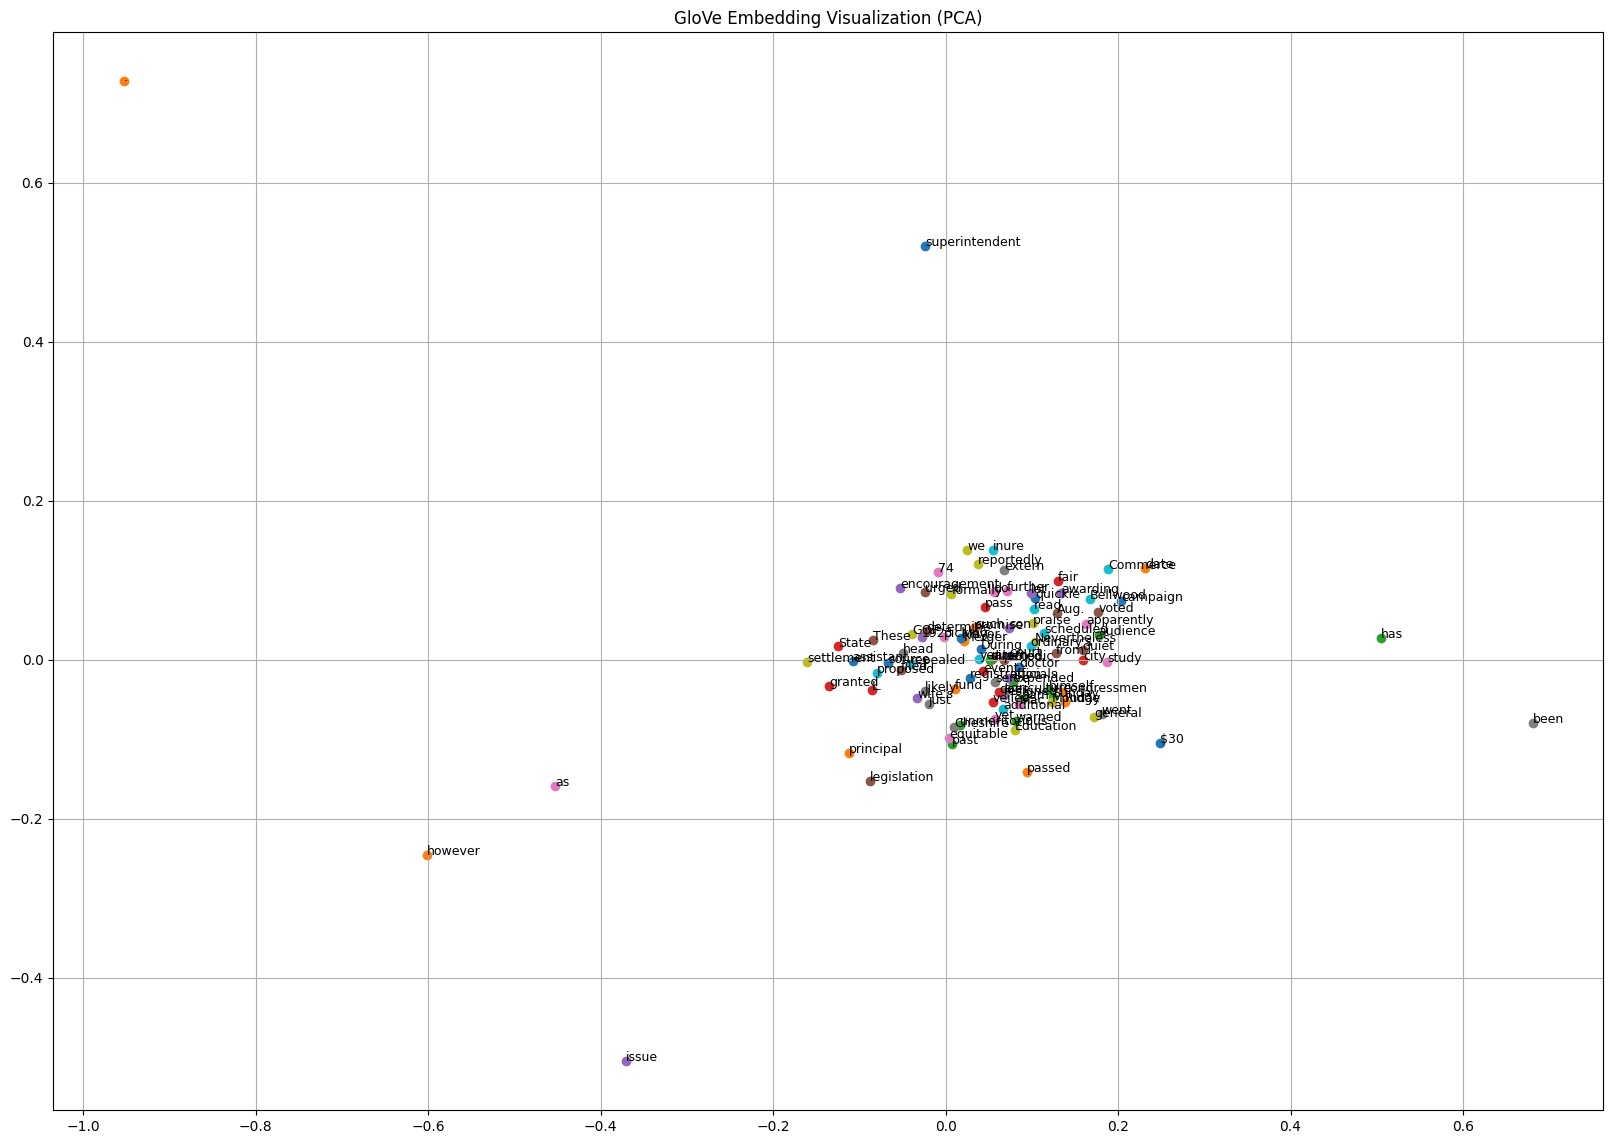

In [185]:
# visualize the glove embedding with pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(glove_embedding)
plt.figure(figsize=(20, 14))
for i, word in enumerate(vocab_subset):
    x, y = embedding_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)
plt.title("GloVe Embedding Visualization (PCA)")
plt.grid(True)
plt.show()